In [55]:
import numpy as np
import pymc3 as pm
import theano.tensor as tt
import scipy.special as sp

In [54]:
n_years = 3
n_total = np.random.randint(1000, 2000+1, n_years)

n_pred = 10
coeff_true = np.linspace(-2., 2., n_pred)
intercept = .1

predictors = [np.random.randn(n, n_pred) for n in n_total]

latent = [x @ coeff_true + sp.logit(intercept) for x in predictors]
observed = [np.random.binomial(1, sp.expit(x)) for x in latent]

n_total_end = [np.sum(x) for x in observed]

for i in range(n_years):
    print(f'In year {i}')
    print(f'the total number is {n_total[i]}, the number of churn is {n_total_end[i]}')
    print(f'the churn rate is {(n_total_end[i])/n_total[i]}')

    print(f'latent churn rate is {sp.expit(latent[i]).mean()}')

In year 0
the total number is 1345, the number of churn is 416
the churn rate is 0.3092936802973978
latent churn rate is 0.31152570297292465
In year 1
the total number is 1015, the number of churn is 334
the churn rate is 0.32906403940886697
latent churn rate is 0.32102030594980485
In year 2
the total number is 1738, the number of churn is 535
the churn rate is 0.30782508630609895
latent churn rate is 0.3070786376037011


In [60]:
with pm.Model() as m:
    betas = pm.Normal('betas', 0., 5., shape=(n_pred, 1))
    c = pm.Normal('c', 0., 10.)
    for i in range(n_years):
        latent = tt.dot(predictors[i], betas) + c
        pm.Binomial(f'observed_year{i}',
                    n=n_total[i],
                    p=tt.nnet.sigmoid(tt.mean(latent)),
                    observed=n_total_end[i])
    trace = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [c, betas]


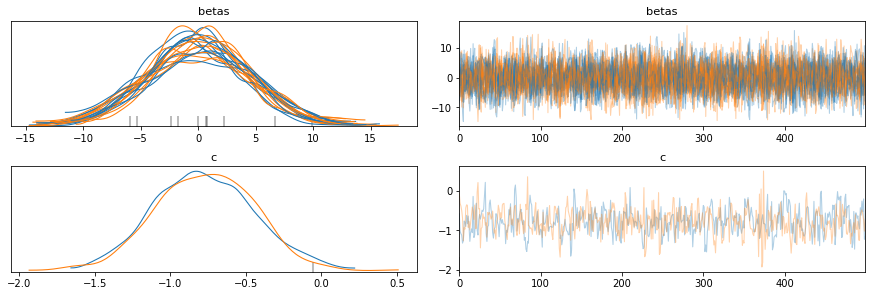

In [61]:
pm.traceplot(trace);

In [63]:
sp.expit(trace['c'].mean())

0.3150838145327926